### Decision Tree Theory

#### Training a Decision Tree

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] #petal length
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X,y)

DecisionTreeClassifier(max_depth=2)

#### Visualising the Decision Tree

In [2]:
from sklearn.tree import  export_graphviz
import graphviz
from IPython.display import Image

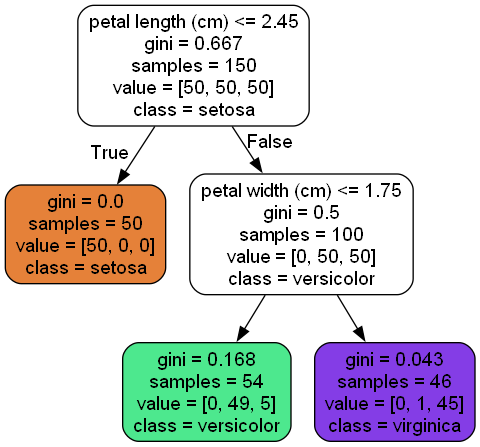

In [3]:
# Export the decision tree to a .dot file
dot_data = export_graphviz(tree_clf,
                           out_file=None,  # Do not write to a file
                           feature_names=iris.feature_names[2:],
                           class_names=iris.target_names,
                           rounded=True,
                           filled=True)

# Use graphviz to create an image from the .dot data
graph = graphviz.Source(dot_data)

# Display the image in the Jupyter notebook
graph.render("iris_tree")  # Save as iris_tree.pdf
graph.format = 'png'
graph.render("iris_tree")  # Save as iris_tree.png

# Display the image
Image(filename='iris_tree.png')

#### How does a Decision tree make predictions?
- In this example you are trying to classify an iris flower
- we start at the root node which is the top most box
- it asks whetherr the flowers petal width is less than 0.8cm
- if it is we move to the box on the left, since there is no mmore child nodes the the instance is classified as a setosa
- if false we move to the right and the same argument applies which can classify the nodes 
- a node has a samples attribute which telll us how manyy training instances have that specific criteria
- A node has a value attribute tells us how many training instances each class in this node applies to for examp-ple the bottom left node appplies to 0 setosa 49 versicolor and 5 virginica
- a nodes gini attribute measures its impurity, a node is pure if gini=0, ie if all trraining instances applied to belongs in the same class

#### Gini Impurity Formula
$$
Gini(p) = 1 - \sum_{i=1}^{k} p_i^2
$$
where $p_{i,k}$ is the ratio of class k instances in the training instances on the ith node

#### Estimating Class Probabilities 

A Decision tree can estimmaqte the probability an instance beklongs to a particular class k, it will ggo through the tree to find the leaf node for the instance and then it returrns the ratio ofd training instances of class k in the node 7
we can do this easilty using the predict functionm

In [4]:
tree_clf.predict_proba([[5,1.5]])

array([[0.        , 0.90740741, 0.09259259]])

clearly the decision tree predicts this to be a versicolor

#### The CART Training Algorithm

CART the classification and rregression tree algorithm trauines thge Decison trees. The training data is sploit into two subsets using a  single ffeature k and a threshold $ t_k$ this could be the oerrall length =<2.45.
- it chooses k and $t_k$ by searching for a pair (k,$t_k$) that produces tghe purest subsets (weighted by their size).
- The equation below is the cost function that the algorithm tries tominimise 
$$
J(k, t_k) = \frac{m_{\text{left}}}{m} G_{\text{left}} + \frac{m_{\text{right}}}{m} G_{\text{right}}
$$

Where:
- $J(k, t_k)$ is the cost function for a given feature $k$ and threshold $t_k$.
- $m_{\text{left}}$ and $m_{\text{right}}$ are the number of instances in the left and right subsets after the split, respectively.
- $m$ is the total number of instances before the split.
- $G_{\text{left}}$ and $G_{\text{right}}$ are the impurity of the left and right subsets, respectively (this can be measured using Gini impurity or another metric like entropy for classification, or mean squared error for regression).



- once the trraining data has been split into two, the same logic is used to spliot the subsets usinng the same logic and the sub subsetsetc
- it will stop rercursing once the maximum depth parameter is defind or when it cannot find a spliot that reduces impurity

#### Gini IMPUITY OR ENTROPY
- by default the Gini impurityy is used but ou can select the entropy instead defined by the shannon entroy

#### Regularisation Hyperrparameters
- Decision trees dont make many assumptions abnout the training data, unlike loiejrar rregrrression which assumes the data is linear
- This model is usually called a non parametric model as the paramters are not defined prior to training so the model overfits to the data easilty
- To avoid overfitting the data we need to restrict the decision trees frreedom durinmg trainign. This is called rregularisation, this hyperpraremters deends on the algorithm used but you can at least restrict the maximum depth of the decisionm Tree.
- in Sklearrn the max depth paameter will rrregularis the model and rreduct risk of overfittinh
- The Decision Tree classifier ghas a few other params 
- min_samples_spliot the mininmum number of sammples a node must have before it can be split
- mion_samples_leaf the minimum number oif samplels a leaf node must have 
- min_weight_fracition_leafsame as above but expressed ass a fraction of the toal number of weighted instances
- max_leaf_nodes the maximij  number of leaf nodes 
- max_features the maximum number of features that are evalueated for splitting at each node
- increasing min_* or max_* will rreguklairse the model

#### Regression
Decison rees can also do regression tasks lets use sklearns `DecisionTreeRegressor` class and traing it on a qwnoisy quadratic data set

In [5]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import matplotlib.pyplot as plt

# Set a random seed
np.random.seed(42)

# Generate random x values between -10 and 10
X = np.linspace(-10, 10, 100).reshape(-1,1)

# Define the true quadratic relationship (e.g., y = ax^2 + bx + c)
a = 1
b = 2
c = 3
y_true = a * X**2 + b * X + c

# Add  noise to the y values
noise = np.random.normal(0, 5, size=X.shape)
y_noisy = y_true + noise

tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X,y_noisy)

DecisionTreeRegressor(max_depth=2)

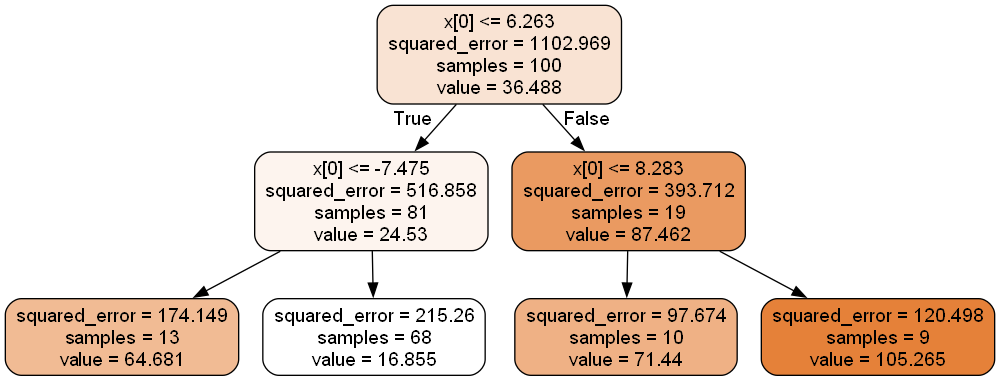

In [6]:
# Export the decision tree to a .dot file
dot_data = export_graphviz(tree_reg ,
                           out_file=None,  # Do not write to a file
                           rounded=True,
                           filled=True)

# Use graphviz to create an image from the .dot data
graph = graphviz.Source(dot_data)

# Display the image in the Jupyter notebook
graph.render("quad data")  # Save as iris_tree.pdf
graph.format = 'png'
graph.render("quad data")  # Save as iris_tree.png

# Display the image
Image(filename='quad data.png')

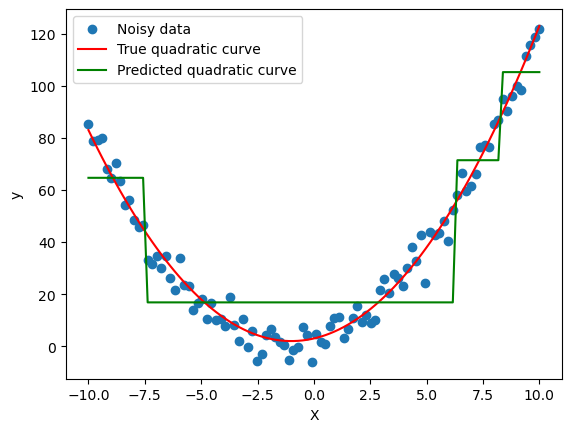

In [7]:
# Plot the noisy dataset
plt.scatter(X, y_noisy, label='Noisy data')
plt.plot(X, y_true, color='red', label='True quadratic curve')
plt.plot(X, tree_reg.predict(X), color='green', label='Predicted quadratic curve')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

- Ypu can see that now it predicts a value instead of a class
- notice that the predicted values fotr each rregion is alwayus the averaghe taget calule of the instances in that region
- The cart algorithmis now minimising the MSE rrather than the iimopurity 
- the decision tree is stilll rone to overfitting ehrr without rregukarisation

#### Instability 
- sINCE decison tree have orthogonal deicison boundaries this makes them sisitive to trainign se rotation
- we can combat this using brincipal componant analysis 
- decision trees are very sensistive to small vairationsin thte training data